In [257]:
import numpy as np
import random
import itertools
from itertools import product
import matplotlib.pyplot as plt

In [258]:
# Parameters
alpha = 0.8 # Increased learning rate
gamma = 0.9  # Discount factor
epsilon_initial = 1.0  # Initial exploration rate
epsilon_decay = 0.9995  # Slightly faster decay rate for epsilon
epsilon_min = 0.1  # Minimum exploration rate
num_episodes = 5000 # Number of training episodes
convergence_threshold = 0.001  # Threshold for convergence

# Resource constraints
resources_c1 = 0.5
resources_c2 = 0.4
resources_c3 = 0.4

# Task resource requirements
k1_resource = 0.1
k2_resource = 0.2

# Arrival and service rates
lambda_1 = 3.51  # Arrival rate for task type k1
lambda_2 = 1.17  # Arrival rate for task type k2
mu_1 = 0.9  # Service rate for task type k1
mu_2 = 0.3  # Service rate for task type k2

# Initialize service times
service_time = {
    "c1_k1": 0, "c1_k2": 0,
    "c2_k1": 0, "c3_k1": 0,
    "c3_k2": 0
}

# Define rewards
def dynamic_reward(state, action):
    reward = 0
    c1_util = state[0] * k1_resource + state[1] * k2_resource
    c2_util = state[2] * k1_resource
    c3_util = state[3] * k1_resource + state[4] * k2_resource

    if c1_util > resources_c1:
        reward -= 5
    if c2_util > resources_c2:
        reward -= 5
    if c3_util > resources_c3:
        reward -= 5

    for i, act in enumerate(action[:5]):
        if act == 1:
            reward += 1 / (1 + state[i])
    for i, act in enumerate(action[5:]):
        if act == 1:
            reward += 2 / (1 + state[i])

    return reward

# Generate valid states
max_tasks_c1_k1 = int(resources_c1 / k1_resource)
max_tasks_c1_k2 = int(resources_c1 / k2_resource)
max_tasks_c2_k1 = int(resources_c2 / k1_resource)
max_tasks_c3_k1 = int(resources_c3 / k1_resource)
max_tasks_c3_k2 = int(resources_c3 / k2_resource)

valid_states = []
state_indices = {}
index = 0
for state in product(
    range(max_tasks_c1_k1 + 1),
    range(max_tasks_c1_k2 + 1),
    range(max_tasks_c2_k1 + 1),
    range(max_tasks_c3_k1 + 1),
    range(max_tasks_c3_k2 + 1)
):
    c1_usage = state[0] * k1_resource + state[1] * k2_resource
    c2_usage = state[2] * k1_resource
    c3_usage = state [3] * k1_resource + state[4] * k2_resource
    if c1_usage <= resources_c1 and c2_usage <= resources_c2 and c3_usage <= resources_c3:
        valid_states.append(state)
        state_indices[state] = index
        index += 1

num_states = len(valid_states)

In [259]:
#a function to generate all different combination of 1s and 0s of certain length
def generate_combinations(length):
    # Create an array of 0s and 1s
    array = [0, 1]
    # Use itertools.product to generate all combinations
    combinations = list(itertools.product(array, repeat=length))
    return combinations

actions_indeces={}
combinations=generate_combinations(10)
#possible actions are the set of actions that you can take, it takes the form of (a_11_p, a_12_p, a_21_p, a_31_p, a_32_p, a_11_o, a_12_o, a_21_o, a_31_o, a_32_o)
possible_actions=[]
i=0
for combination in combinations:
    #this if conditions means that for a set of action to be valid, it has to decide what to do with both task 1 and task 2
    # it cant allocate a task to more than one provider or more than one method (provisioned or on-demand)
    #if it passes the checks, then it is a valid action
    if combination[0]+combination[2]+combination[3]+combination[5]+combination[7]+combination[8] == 1:
        if combination[1]+combination[4]+combination[6]+combination[9] ==1:
            possible_actions.append(combination)
            actions_indeces[combination]=i
            i=i+1

for action in possible_actions:
    print(action)
num_actions = len(possible_actions)

(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
(0, 0, 0, 0, 0, 0, 0, 1, 0, 1)
(0, 0, 0, 0, 0, 0, 1, 0, 1, 0)
(0, 0, 0, 0, 0, 0, 1, 1, 0, 0)
(0, 0, 0, 0, 0, 1, 0, 0, 0, 1)
(0, 0, 0, 0, 0, 1, 1, 0, 0, 0)
(0, 0, 0, 0, 1, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 1, 0, 0, 1, 0, 0)
(0, 0, 0, 0, 1, 1, 0, 0, 0, 0)
(0, 0, 0, 1, 0, 0, 0, 0, 0, 1)
(0, 0, 0, 1, 0, 0, 1, 0, 0, 0)
(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 0, 0, 0, 0, 0, 1)
(0, 0, 1, 0, 0, 0, 1, 0, 0, 0)
(0, 0, 1, 0, 1, 0, 0, 0, 0, 0)
(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
(0, 1, 0, 0, 0, 0, 0, 1, 0, 0)
(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)
(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)
(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 0, 0, 0, 0, 0, 0, 1)
(1, 0, 0, 0, 0, 0, 1, 0, 0, 0)
(1, 0, 0, 0, 1, 0, 0, 0, 0, 0)
(1, 1, 0, 0, 0, 0, 0, 0, 0, 0)


In [260]:
servicetime_t1_c1 = 0
servicetime_t1_c2 = 0
servicetime_t2_c1 = 0
servicetime_t2_c3 = 0
servicetime_t1_c3 = 0
min_index=0

flag = False

def get_next_state(state, action, flag):
    """Simulate the next state based on current state, action, and task arrivals."""
    global servicetime_t1_c1, servicetime_t1_c2, servicetime_t2_c1, servicetime_t2_c3, servicetime_t1_c3

    if flag:
        return state  # If flag is True (converged), return the current state without updates.

    next_state = list(state)
    num_arrivals_k1 = random.expovariate(lambda_1)
    num_arrivals_k2 = random.expovariate(lambda_2)


        
        # Handle arrivals of tasks and set random service time if a task arrives
    values = [
    num_arrivals_k1,
    num_arrivals_k2,
    servicetime_t1_c1,
    servicetime_t1_c2,
    servicetime_t2_c1,
    servicetime_t2_c3,
    servicetime_t1_c3,
]

# Find the index of the minimum value
    min_index = np.argmin(values)
           
    if min_index == 0:
        slot = random.choice(["c1_k1", "c2_k1", "c3_k1"])
        if slot == "c1_k1" and servicetime_t1_c1 == 0:
            servicetime_t1_c1 = random.expovariate(mu_1)
        elif slot == "c2_k1" and servicetime_t2_c1 == 0:
            servicetime_t2_c1 = random.expovariate(mu_1)
        elif slot == "c3_k1" and servicetime_t1_c3 == 0:
            servicetime_t1_c3 = random.expovariate(mu_1)
        num_arrivals_k1 = random.expovariate(lambda_1)
        num_arrivals_k2-=num_arrivals_k1
        servicetime_t1_c1-=num_arrivals_k1
        servicetime_t1_c2-=num_arrivals_k1
        servicetime_t1_c3-=num_arrivals_k1
        servicetime_t2_c1-=num_arrivals_k1
        servicetime_t2_c3-=num_arrivals_k1
        if action[0]==1:
            next_state[0] = state[0] + 1
            c1_usage = state[0] * k1_resource + state[1] * k2_resource
            if c1_usage <= resources_c1:
                state = (state[0], state[1], state[2], state[3], state[4])
            if action[2]==1:
                next_state[2] = state[2] + 1
                c2_usage = state[2] * k1_resource 
                if c2_usage <= resources_c2:
                    state = (state[0], state[1], state[2], state[3], state[4])
            if action[3]==1:
                next_state[3] = state[3] + 1
                c3_usage = state[3] * k1_resource + state[4] * k2_resource
                if c3_usage <= resources_c3:
                    state = (state[0], state[1], state[2], state[3], state[4])
                        
            
    if min_index == 1:
        slot = random.choice(["c1_k2", "c3_k2"])
        if slot == "c1_k2" and servicetime_t1_c2 == 0:
            servicetime_t1_c2 = random.expovariate(mu_2)
        elif slot == "c3_k2" and servicetime_t2_c3 <= 0:
            servicetime_t2_c3 = random.expovariate(mu_2)
        num_arrivals_k2 = random.expovariate(lambda_2)
        num_arrivals_k1-=num_arrivals_k2
        servicetime_t1_c1-=num_arrivals_k2
        servicetime_t1_c2-=num_arrivals_k2
        servicetime_t1_c3-=num_arrivals_k2
        servicetime_t2_c1-=num_arrivals_k2
        servicetime_t2_c3-=num_arrivals_k2
        if action[1]==1:
            next_state[1] = state[1] + 1
            c1_usage = state[0] * k1_resource + state[1] * k2_resource
            if c1_usage <= resources_c1:
                state = (state[0], state[1], state[2], state[3], state[4])
        if action[4]==1:
            next_state[4] = state[4] + 1
            c3_usage = state[3] * k1_resource + state[4] * k2_resource
            if c3_usage <= resources_c3:
                state = (state[0], state[1], state[2], state[3], state[4])

        # Decrement service times and serve tasks if completed
    if min_index==2:
        num_arrivals_k2-=servicetime_t1_c1
        num_arrivals_k1-=servicetime_t1_c1
        servicetime_t1_c1-=servicetime_t1_c1
        servicetime_t1_c2-=servicetime_t1_c1
        servicetime_t1_c3-=servicetime_t1_c1
        servicetime_t2_c1-=servicetime_t1_c1
        servicetime_t2_c3-=servicetime_t1_c1
        if next_state[0] > 0:
            next_state[0] -= 1
            if next_state[0]>0:
                servicetime_t1_c1-=random.expovariate(mu_1)

    if min_index==3:
        num_arrivals_k2-=servicetime_t1_c2
        num_arrivals_k1-=servicetime_t1_c2
        servicetime_t1_c1-=servicetime_t1_c2
        servicetime_t1_c2-=servicetime_t1_c2
        servicetime_t1_c3-=servicetime_t1_c2
        servicetime_t2_c1-=servicetime_t1_c2
        servicetime_t2_c3-=servicetime_t1_c2
        if next_state[1] > 0:
            next_state[1] -= 1
            if next_state[1]>0:
                servicetime_t1_c2-=random.expovariate(mu_1)

    if min_index==4:
        num_arrivals_k2-=servicetime_t1_c3
        num_arrivals_k1-=servicetime_t1_c3
        servicetime_t1_c1-=servicetime_t1_c3
        servicetime_t1_c2-=servicetime_t1_c3
        servicetime_t1_c3-=servicetime_t1_c3
        servicetime_t2_c1-=servicetime_t1_c3
        servicetime_t2_c3-=servicetime_t1_c3
        if next_state[2] > 0:
            next_state[2] -= 1
            if next_state[2]>0:
                servicetime_t1_c3-=random.expovariate(mu_1)

    if min_index==5:
        num_arrivals_k2-=servicetime_t2_c1
        num_arrivals_k1-=servicetime_t2_c1
        servicetime_t1_c1-=servicetime_t2_c1
        servicetime_t1_c2-=servicetime_t2_c1
        servicetime_t1_c3-=servicetime_t2_c1
        servicetime_t2_c1-=servicetime_t2_c1
        servicetime_t2_c3-=servicetime_t2_c1
        if next_state[3] > 0:
            next_state[3] -= 1
            if next_state[3]>0:
                servicetime_t2_c1-=random.expovariate(mu_2)

    if min_index==6:
        num_arrivals_k2-=servicetime_t2_c3
        num_arrivals_k1-=servicetime_t2_c3
        servicetime_t1_c1-=servicetime_t2_c3
        servicetime_t1_c2-=servicetime_t2_c3
        servicetime_t1_c3-=servicetime_t2_c3
        servicetime_t2_c1-=servicetime_t2_c3
        servicetime_t2_c3-=servicetime_t2_c3
        if next_state[4] > 0:
            next_state[4] -= 1
            if next_state[4]>0:
                servicetime_t2_c3-=random.expovariate(mu_2)

    # Increment state based on action
    for i, act in enumerate(action[:5]):  # Provisioned resources
        if act == 1:
            next_state[i] += 1

    return tuple(next_state)

In [261]:
# Q-table initialization
Q_table = np.zeros((num_states, num_actions))
def epsilon_greedy(state_idx, epsilon):
    if random.random() < epsilon:
        return random.randint(0, num_actions - 1)
    return np.argmax(Q_table[state_idx])

In [262]:
# Track average Q-values per episode
average_Q_per_episode = []
max_Q_per_episode=[]

# Q-learning loop
for episode in range(num_episodes):
    epsilon = max(epsilon_min, epsilon_initial * (epsilon_decay ** episode))
    state = random.choice(valid_states)
    
    while True:
        state_idx = state_indices[state]
        action_idx = epsilon_greedy(state_idx, epsilon)
        action = possible_actions[action_idx]

        next_state = get_next_state(state, action, flag)
        if next_state not in state_indices:
            break
        next_state_idx = state_indices[next_state]
        reward = dynamic_reward(state, action)

        Q_table[state_idx, action_idx] += alpha * (
            reward + gamma * np.max(Q_table[next_state_idx]) - Q_table[state_idx, action_idx]
        )

        state = next_state

    # Check for convergence
    delta_max = np.max(np.abs(Q_table - np.roll(Q_table, 1, axis=0)))  # Maximum Q-value change
    if delta_max < convergence_threshold or episode > 100000:  # Allow at least 50 episodes of training
        print(f"Convergence reached at episode {episode}")
        flag = True
        break  # Stop training when convergence is reached after the initial phase

    # Record the average Q-value for plotting
    # average_Q = min(np.mean(Q_table), 5)
    average_Q = np.mean(Q_table)
    max_Q=np.max(Q_table)

    average_Q_per_episode.append(average_Q)
    max_Q_per_episode.append(max_Q)

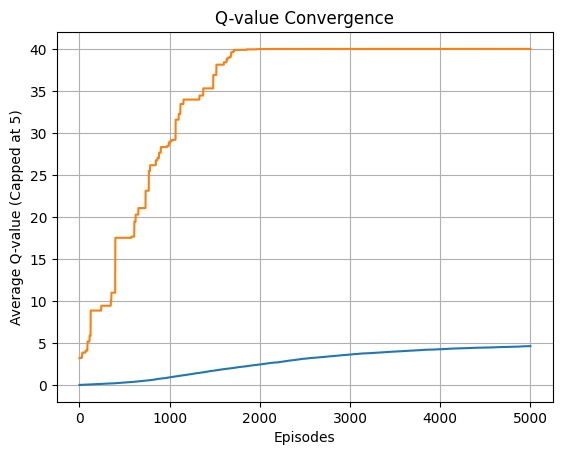

In [263]:
# Always generate the graph, even if convergence occurs early
plt.plot(range(len(average_Q_per_episode)), average_Q_per_episode )
plt.plot(range(len(max_Q_per_episode)), max_Q_per_episode )
plt.xlabel("Episodes")
plt.ylabel("Average Q-value (Capped at 5)")
plt.title("Q-value Convergence")
plt.grid()
plt.show()

In [264]:
# Output optimal policy
optimal_policy = [np.argmax(Q_table[state_indices[s]]) for s in valid_states]
print("Optimal Policy:")
for state, action_idx in zip(valid_states, optimal_policy):
    print(f"State {state} -> Action {possible_actions[action_idx]}")

Optimal Policy:
State (0, 0, 0, 0, 0) -> Action (0, 0, 1, 0, 0, 0, 1, 0, 0, 0)
State (0, 0, 0, 0, 1) -> Action (0, 1, 0, 0, 0, 0, 0, 1, 0, 0)
State (0, 0, 0, 0, 2) -> Action (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
State (0, 0, 0, 1, 0) -> Action (0, 0, 0, 0, 1, 0, 0, 0, 1, 0)
State (0, 0, 0, 1, 1) -> Action (0, 1, 0, 0, 0, 0, 0, 1, 0, 0)
State (0, 0, 0, 2, 0) -> Action (0, 0, 0, 0, 1, 0, 0, 0, 1, 0)
State (0, 0, 0, 2, 1) -> Action (0, 1, 0, 0, 0, 0, 0, 1, 0, 0)
State (0, 0, 0, 3, 0) -> Action (0, 0, 1, 0, 0, 0, 0, 0, 0, 1)
State (0, 0, 0, 4, 0) -> Action (0, 0, 0, 0, 0, 1, 1, 0, 0, 0)
State (0, 0, 1, 0, 0) -> Action (0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
State (0, 0, 1, 0, 1) -> Action (0, 1, 0, 1, 0, 0, 0, 0, 0, 0)
State (0, 0, 1, 0, 2) -> Action (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
State (0, 0, 1, 1, 0) -> Action (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
State (0, 0, 1, 1, 1) -> Action (0, 0, 0, 0, 0, 1, 1, 0, 0, 0)
State (0, 0, 1, 2, 0) -> Action (0, 0, 1, 0, 0, 0, 1, 0, 0, 0)
State (0, 0, 1, 2, 1) -> Action (0, 1, 